#Linear Regression with scikit-learn

We will use the data we already cleaned in the previous example : `auto_price_cleaned.csv`

# Load and Quick Check

The dataset column name and type : 
1. `symboling`: -3, -2, -1, 0, 1, 2, 3.
2. `normalized_losses`: continuous from 65 to 256.
3. `make`: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. `fuel_type`: diesel, gas.
5. `aspiration`: std, turbo.
6. `num_of_doors`: four, two.
7. `body_style`: hardtop, wagon, sedan, hatchback, convertible.
8. `drive_wheels`: 4wd, fwd, rwd.
9. `engine_location`: front, rear.
10. `wheel_base`: continuous from 86.6 120.9.
11. `length`: continuous from 141.1 to 208.1.
12. `width`: continuous from 60.3 to 72.3.
13. `height`: continuous from 47.8 to 59.8.
14. `curb_weight`: continuous from 1488 to 4066.
15. `engine_type`: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. `num_of_cylinders`: eight, five, four, six, three, twelve, two.
17. `engine_size`: continuous from 61 to 326.
18. `fuel_system`: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. `bore`: continuous from 2.54 to 3.94.
20. `stroke`: continuous from 2.07 to 4.17.
21. `compression_ratio`: continuous from 7 to 23.
22. `horsepower`: continuous from 48 to 288.
23. `peak_rpm`: continuous from 4150 to 6600.
24. `city_mpg`: continuous from 13 to 49.
25. `highway_mpg`: continuous from 16 to 54.
26. `price`: continuous from 5118 to 45400


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
def plot_chart(xcol, ycol, dataframe):
  fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)
  
  fig.suptitle(xcol)
  rot = 90

  axes[0].set_title('Price by ' + xcol)
  chart = sns.barplot(ax=axes[0], data=dataframe, x =xcol, y=ycol)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=rot, horizontalalignment='right')

  axes[1].set_title('Price by ' + xcol)
  chart2 = sns.boxplot(ax=axes[1], data=dataframe, x=xcol, y=ycol)
  chart2.set_xticklabels(chart.get_xticklabels(), rotation=rot, horizontalalignment='right')

  axes[2].set_title('Record Count')
  chart3 = sns.histplot(ax=axes[2], data=dataframe, x=xcol, color='steelblue')#, kde=True)
  chart3.set_xticklabels(chart.get_xticklabels(), rotation=rot, horizontalalignment='right')


In [ ]:
!wget https://www.dropbox.com/s/vqhnxjkcoqgdah7/auto_price_cleaned.csv

--2021-09-20 17:15:54--  https://www.dropbox.com/s/vqhnxjkcoqgdah7/auto_price_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vqhnxjkcoqgdah7/auto_price_cleaned.csv [following]
--2021-09-20 17:15:54--  https://www.dropbox.com/s/raw/vqhnxjkcoqgdah7/auto_price_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc24aa705cd8d7f8984883df58ea.dl.dropboxusercontent.com/cd/0/inline/BWjGhTH9pZoqI0SHV1pLdpLpgS4HBqypuFHXNzWd7tjH34tTOvKlbF1dgw0kU4-OEmv9JmPfiFBYmw0TVnXXtcLm7lqKO7cwjs7l-7dju0BmzlReR0MF1TAkL_P-FrUKZ7dpRGW8dEDwLJ1DeLh7UxHQ/file# [following]
--2021-09-20 17:15:55--  https://uc24aa705cd8d7f8984883df58ea.dl.dropboxusercontent.com/cd/0/inline/BWjGhTH9pZoqI0SHV1pLdpLpgS4HBqypuFHXNzWd7tjH34tTOvKlbF1dgw0k

In [ ]:
! head auto_price_cleaned.csv

symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
3.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.4,10.0,102.0,5500.0,24.0,30.0,13950.0
2.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.4,8.0,115.0,5500.0,18.0,22.0,17450.0
2.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,

Load the data

In [ ]:
df = pd.read_csv('auto_price_cleaned.csv')

Perform quick check. 
The column format can be an indicator of missing or invalid data, especially for numeric columns (columns with continuous value).


In [ ]:
# tampilkan 5 record pertama dengan menggunakan fungsi head
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [ ]:
# tampilkan struktur data dengan menggunakan fungsi info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    float64
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    object 
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    float64
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    object 
 15  engine_size        193 non-null    float64
 16  fuel_system        193 non

In [ ]:
# menampilkan dimensi dataframe dengan menggunakan property shape
df.shape

(193, 25)

In [ ]:
# menambilkan nilai statistik dasar
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,193.0,0.797927,1.235582,-2.00,0.00,1.00,2.00,3.00
wheel_base,193.0,98.923834,6.152409,86.60,94.50,97.00,102.40,120.90
length,193.0,174.326425,12.478593,141.10,166.30,173.20,184.60,208.10
width,193.0,65.893782,2.137795,60.30,64.10,65.40,66.90,72.00
height,193.0,53.869948,2.394770,47.80,52.00,54.10,55.70,59.80
curb_weight,193.0,2561.507772,526.700026,1488.00,2145.00,2414.00,2952.00,4066.00
engine_size,193.0,128.124352,41.590452,61.00,98.00,120.00,146.00,326.00
bore,193.0,3.330622,0.272385,2.54,3.15,3.31,3.59,3.94
stroke,193.0,3.248860,0.315421,2.07,3.11,3.29,3.41,4.17
compression_ratio,193.0,10.143627,3.977491,7.00,8.50,9.00,9.40,23.00


#Data Exploration

In [ ]:
num_column = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'] 

## Target variable 

Check the target value distribution with histogram + density plot.

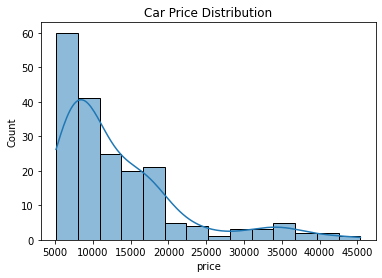

In [ ]:
plt.title('Car Price Distribution')
sns.histplot(df, x='price', kde=True)
plt.show()

We can see that the value is right skewed. This can affect the model training. Since the target value > 0, it might be a good idea to perform log transformation.  

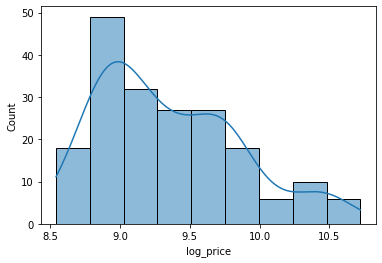

In [ ]:
# menambahkan kolom log_price = log(price)

df['log_price'] = np.log(df['price'])

sns.histplot(df, x='log_price', kde=True)

The log transform result is still skewed, but much better than the original.

## Categorical Variables
Next, examine the input/independent variables. Let's start with categorical variables.

We can show the possible correlation between the target (`price` column) and all categorical variables by plotting some chart for each column. 

We will use bar-chart with error line and boxplot, and we will also show the distribution of each variable with bar chart.

Plot all categorical variables

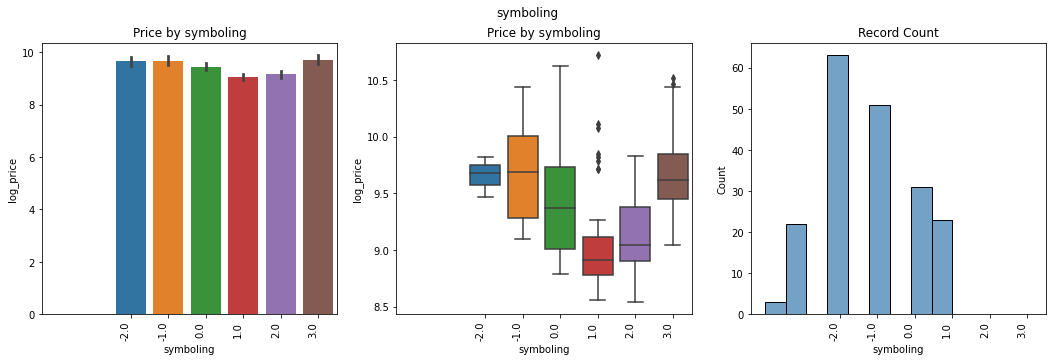

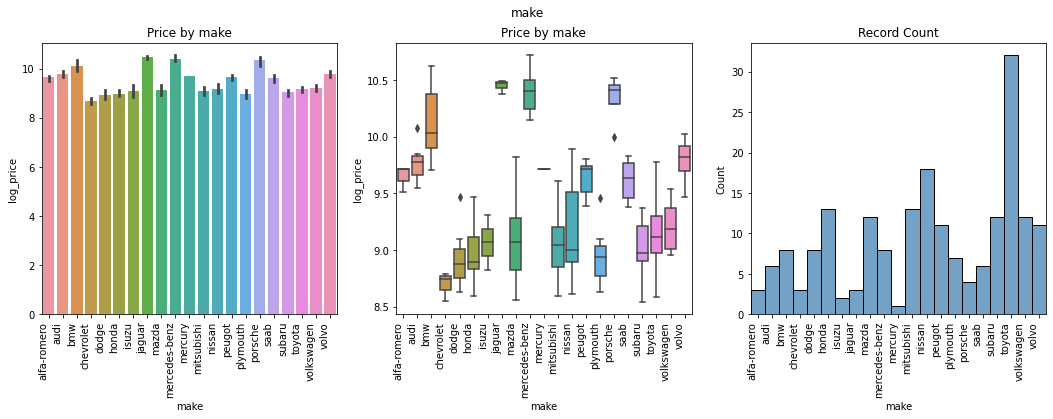

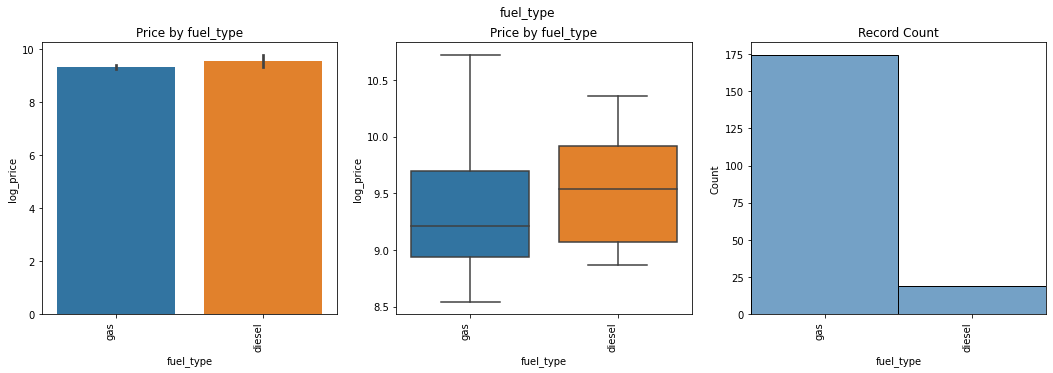

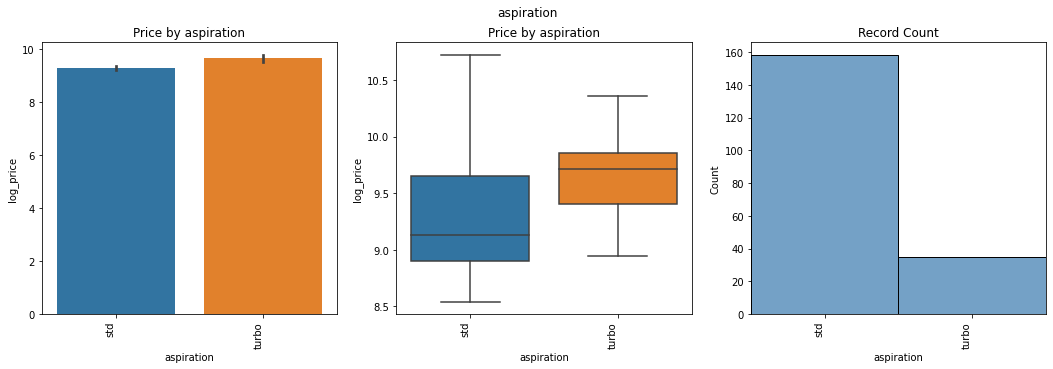

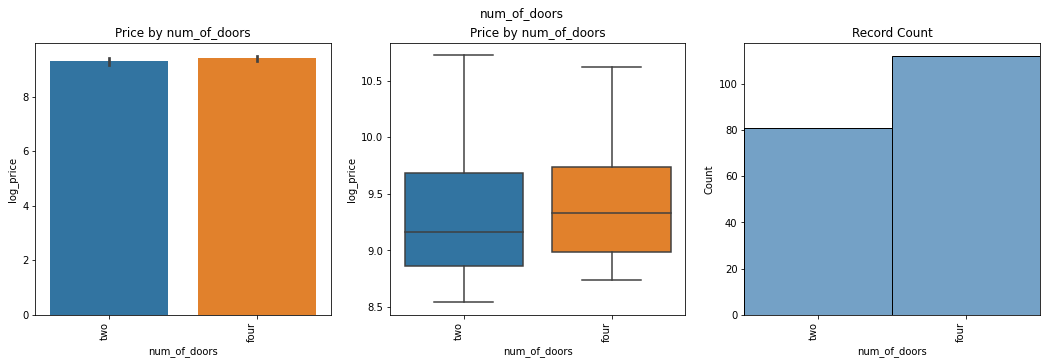

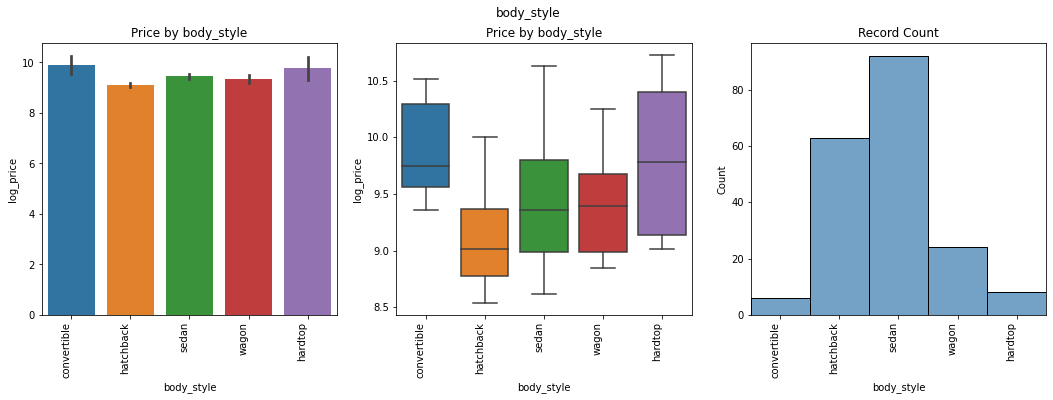

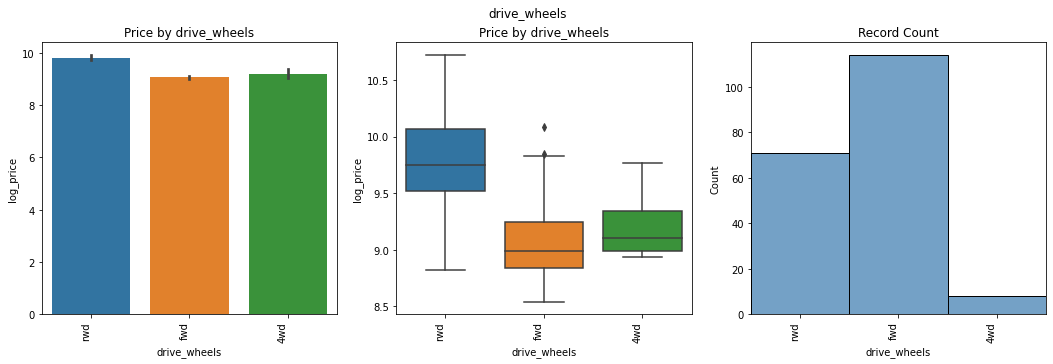

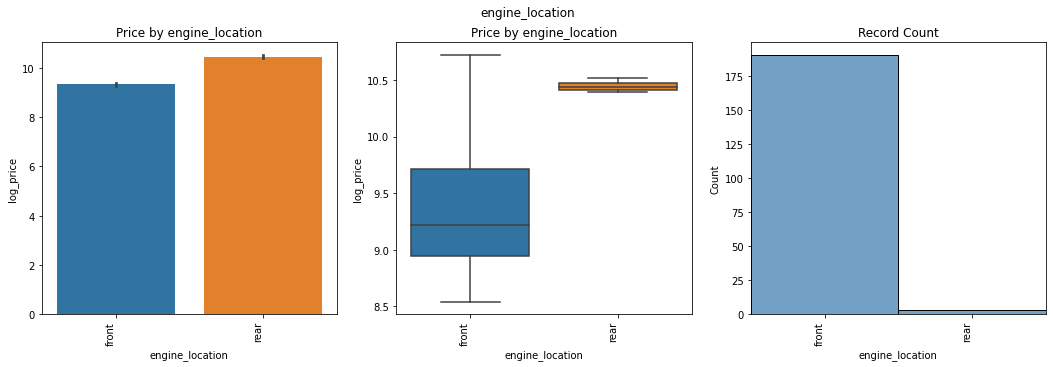

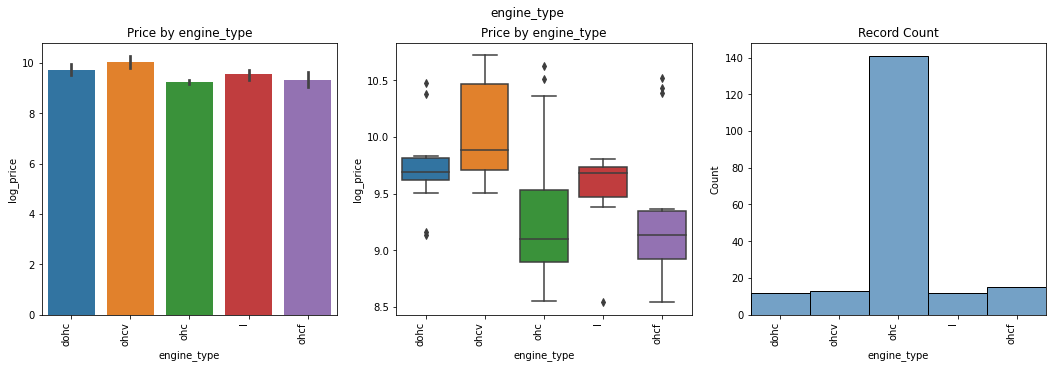

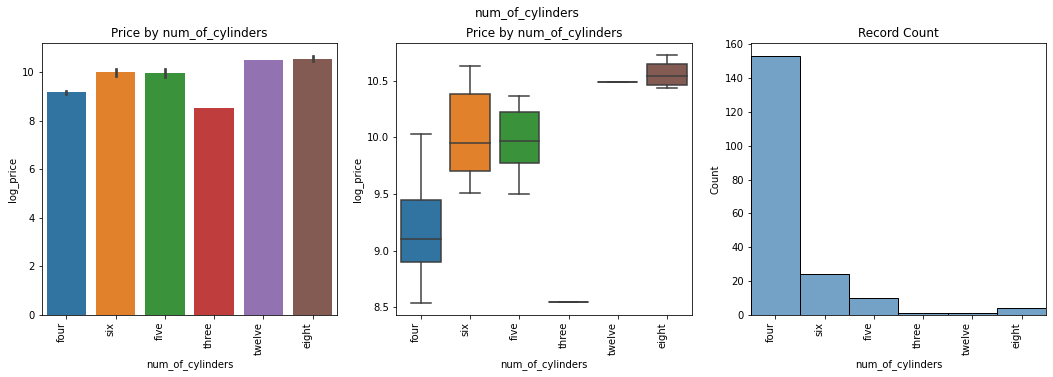

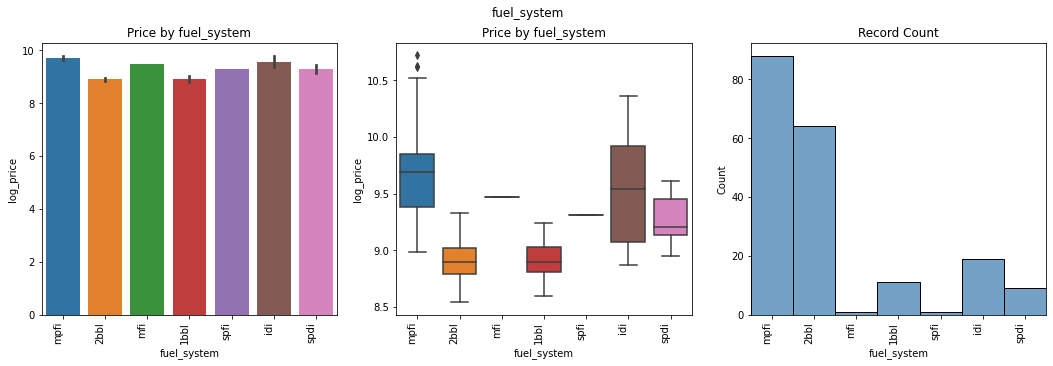

In [ ]:
cat_column = ['symboling', 'make', 'fuel_type', 'aspiration', 'num_of_doors', \
              'body_style', 'drive_wheels', 'engine_location', 'engine_type', \
              'num_of_cylinders', 'fuel_system']

for col in cat_column:
  plot_chart(col,'log_price',df)

Kita gunakan 4 variabel kategorikal yaitu: `fuel_type, aspiration, drive_wheels`, dan `num_of_cylinders`.

## Numerical Variables

### Correlation with target variable

First, let's look at the correlation between the target variable and the numerical independent variables.

We list all numeric variables, then use the `corr` function in the pandas `DataFrame` to calculate the correlation between all these variables.

In [ ]:
num_column = ['log_price', 'wheel_base', 'length', 'width', 'height', 'curb_weight', \
              'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',\
              'peak_rpm', 'city_mpg', 'highway_mpg'] 

The output of the `corr` function is a dataframe containing the correlation matrix

In [ ]:
#compute correlation matrix
corr = df[num_column].corr()
corr

,log_price,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
log_price,1.000000,0.640086,0.784258,0.801764,0.190950,0.894539,0.852459,0.609027,0.111484,0.091887,0.835485,-0.115489,-0.791876,-0.794719
wheel_base,0.640086,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771
length,0.784258,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264
width,0.801764,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009
height,0.190950,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850
curb_weight,0.894539,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104
engine_size,0.852459,0.568375,0.686998,0.739903,0.026906,0.857188,1.000000,0.581854,0.214518,0.025257,0.845325,-0.217769,-0.716378,-0.737531
bore,0.609027,0.495957,0.606373,0.541633,0.182445,0.645070,0.581854,1.000000,-0.065038,-0.004172,0.572972,-0.273766,-0.601369,-0.608804
stroke,0.111484,0.174225,0.121888,0.188733,-0.054338,0.175349,0.214518,-0.065038,1.000000,0.199600,0.102913,-0.068420,-0.031248,-0.040274
compression_ratio,0.091887,0.252234,0.156061,0.188631,0.253934,0.161030,0.025257,-0.004172,0.199600,1.000000,-0.203818,-0.439741,0.314648,0.249669


Select the correlation with `price` column and use a barchart to show the comparison

Text(0.5, 1.0, 'Correlation between Price and Numeric Variables')

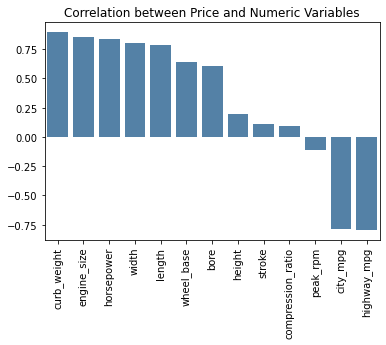

In [ ]:
#transform into series
corr_series = corr[corr < 1].unstack().transpose()\
    .drop_duplicates()

#select and sort
price = corr_series['log_price'].drop('log_price').sort_values(ascending = False)

#visualize
sns.barplot(x=price.index.to_numpy(),y=price.to_numpy(), color='steelblue')
plt.xticks(rotation=90)
plt.title('Correlation between Price and Numeric Variables')

It shows that there are 4 variables with very low correlation to the `price` variable (the value is close to 0) : `height, stroke, compression ratio,` and `peak_rpm`.

We will exclude these four variables from our dataset.

### Check for multicollinearity between variables

Next, we will check the multicollinearity between independent variables, by looking at the correlation between these variables. This time we will use a heatmap.

In [ ]:
#select column with high correlation to price
num_column = ['log_price', 'wheel_base', 'length', 'width', 'curb_weight', \
              'engine_size', 'horsepower', 'bore', 'city_mpg', 'highway_mpg'] 

In [ ]:
#compute correlation matrix
corr = df[num_column].corr()

Text(0.5, 1.0, 'Correlation between Numeric Variables')

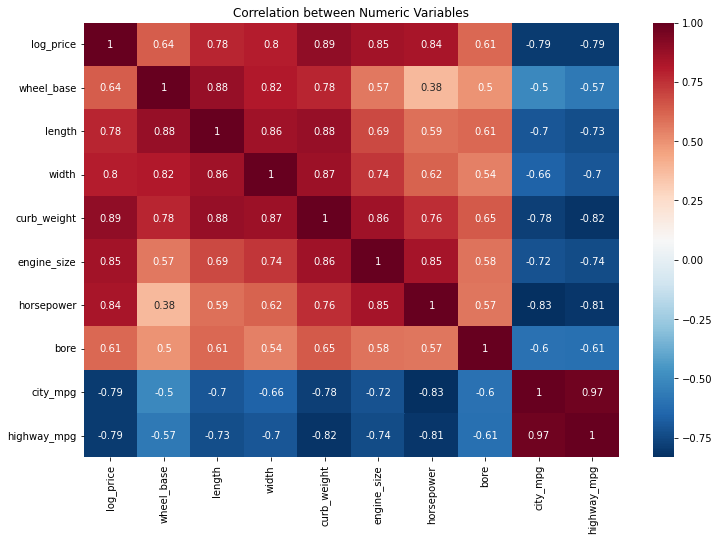

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="RdBu_r",annot=True)
plt.title('Correlation between Numeric Variables')

From the heatmap above, we can see that several variables are highly correlated with each other. A high correlation between independent variables will have a unfavorable effect on the model.

We will use several variables for our training and test set : `wheel_base, bore, horsepower`, and `highway_mpg`.

In [ ]:
#num_column = ['log_price', 'width', 'curb_weight', 'horsepower', 'highway_mpg']
num_column = ['log_price', 'wheel_base', 'bore', 'horsepower', 'highway_mpg'] 

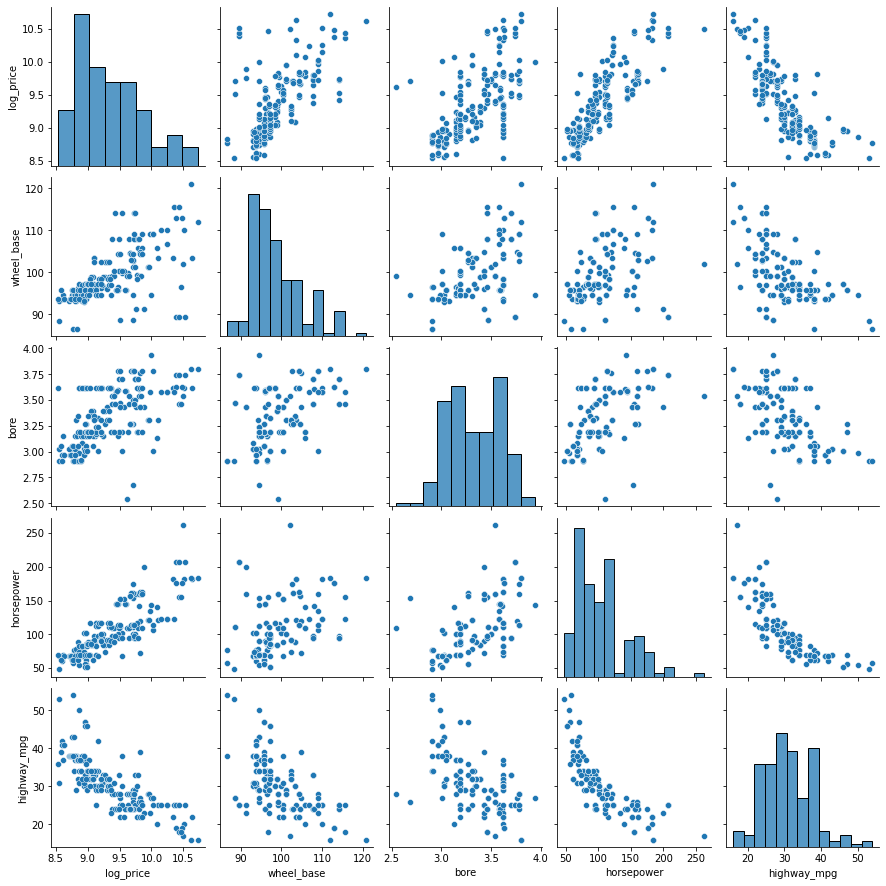

In [ ]:
sns.pairplot(df[num_column])
plt.show()

# Data Preparation

Next, we will perform some preprocessing on the data

## Transform Categorical Variables

Machine learning algorithms require input of numeric type, so we must transform categorical variables into numeric first.

The transformation method used is **one-hot encoding**.

We will use `OneHotEncoder` in the `sklearn` package.

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore') 

In [ ]:
# contoh one hot encoding untuk kolom body_style
encoded = enc.fit_transform(df[['body_style']]).toarray()

print(df.body_style.unique())
print('\nMatrix shape after encoding 1 variable')
print(encoded.shape)
print('\nValue before encoding')
print(df[['body_style']].head(3))
print('\nValue after encoding')
print(encoded[:3, :]) #

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Matrix shape after encoding 1 variable
(193, 5)

Value before encoding
    body_style
0  convertible
1  convertible
2    hatchback

Value after encoding
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


Transform the rest of the columns

In [ ]:
cat_column_inc = ['fuel_type', 'aspiration', 'drive_wheels', 'num_of_cylinders']

for col in cat_column_inc:
  encoded = np.concatenate([encoded, enc.fit_transform(df[[col]]).toarray()], axis = 1) 
  
print(encoded.shape)
print(encoded[:2, :])


(193, 18)
[[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]


Now we have 193 records with 18 columns.

In [ ]:
#num_column = ['width', 'curb_weight', 'horsepower', 'highway_mpg']
num_column = ['wheel_base', 'bore', 'horsepower', 'highway_mpg']  
num_cols = np.array(df[num_column])

encoded = np.concatenate([encoded, num_cols], axis = 1)
print(encoded.shape)
print(encoded[:2, :])

(193, 22)
[[  1.     0.     0.     0.     0.     0.     1.     1.     0.     0.
    0.     1.     0.     0.     1.     0.     0.     0.    88.6    3.47
  111.    27.  ]
 [  1.     0.     0.     0.     0.     0.     1.     1.     0.     0.
    0.     1.     0.     0.     1.     0.     0.     0.    88.6    3.47
  111.    27.  ]]


In [ ]:
df['features'] = encoded.tolist()
df.head(5)

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,log_price,features
0,3.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,9.510075,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
1,3.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,9.711116,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
2,1.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,9.711116,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
3,2.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,9.543235,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."
4,2.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,9.767095,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ..."


## Split training and testing set

Divide the dataset into 6:4 split ratio for training and testing set.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df[['features','log_price']], train_size=0.6, test_size=0.4, random_state = 0)
print(train['features'].head(5))

2      [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...
59     [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...
107    [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...
108    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...
43     [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...
Name: features, dtype: object


In [ ]:
#feature
x_train = np.array(train['features'].tolist())
x_test = np.array(test['features'].tolist())

# target
y_train = train['log_price'].to_numpy()
y_test = test['log_price'].to_numpy()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(115, 22)
(115,)
(78, 22)
(78,)


We have 115 records in training set and 78 rows in test set.

## Rescale the Numeric Variables

Numeric variables need to be rescaled so that they have a similar range of values. Rescaling prevents differences in the range of values from influencing the model training.

We will use the `StandardScaler` function of `Scikit Learn` to perform Zscore scaling.

Notice that the scaler is fit on the training data only. Test data should always be scaled using the parameters from the training data. This is done to avoid data leakage in the test set.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train[:,18:])

x_train[:,18:] = scaler.transform(x_train[:,18:])
x_test[:,18:] = scaler.transform(x_test[:,18:])

print(x_train.shape)
x_train[:2,:]

(115, 22)


array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        , -0.67730044, -2.29194189,
         1.49559604, -0.75875024],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.67196601,  0.85499344,
         0.61995145, -0.9020282 ]])

# Train model

As we can see, the model training process only requires 3 lines of code.

In [ ]:
from sklearn import linear_model

lm = linear_model.LinearRegression(fit_intercept = False)
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

0.0
[ 1.35033183  0.93031088  1.04207019  1.13694887  1.05220411  2.89303122
  2.61883466  2.80069371  2.71117218  1.81068446  1.76965378  1.93152765
  1.26475232  1.20942478  0.95935337  1.05177649  1.02655893  0.
  0.09780081  0.0060529   0.28688006 -0.03707545]


# Evaluate

## Print Metrics

In [ ]:
import sklearn.metrics as skm
import math

y_score = lm.predict(x_test) 

r2 = skm.r2_score(y_test, y_score)
r2_adj = 1-((1-r2)*(y_test.shape[0] - 1)/(y_test.shape[0] - x_test.shape[1] - 1))

print('Mean Square Error      = ' + str(skm.mean_squared_error(y_test, y_score)))
print('Root Mean Square Error = ' + str(math.sqrt(skm.mean_squared_error(y_test, y_score))))
print('Mean Absolute Error    = ' + str(skm.mean_absolute_error(y_test, y_score)))
print('Median Absolute Error  = ' + str(skm.median_absolute_error(y_test, y_score)))
print('R^2                    = ' + str(r2))
print('Adjusted R^2           = ' + str(r2_adj))

Mean Square Error      = 0.0331319398322808
Root Mean Square Error = 0.18202181141907361
Mean Absolute Error    = 0.141294387269842
Median Absolute Error  = 0.11124667635141705
R^2                    = 0.8804858036395121
Adjusted R^2           = 0.832680125095317


The performance of the resulting model is not too bad, as can be seen from the values shown in the metrics above.

The value of R^2 and adjusted R^2 is also quite good. Chances are we get a data split which is quite okay

## Plot Residuals

We will look at the residual value or error, which is the difference between the actual value of the target variable and the predicted value.

Text(0, 0.5, 'count')

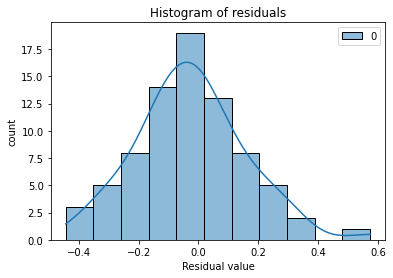

In [ ]:
#compute residuals vector
residuals = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1)) 

sns.histplot(residuals, kde=True)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('count')

Text(0, 0.5, 'Residual')

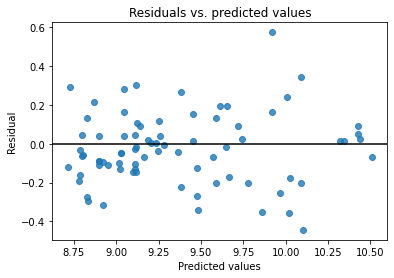

In [ ]:
graph = sns.regplot(x = y_score, y = residuals, fit_reg=False)
graph.axhline(0, color='black')
plt.title('Residuals vs. predicted values')
plt.xlabel('Predicted values')
plt.ylabel('Residual')

Since the target variable we are using is in a log value, we will return it to its original value and re-plot them.

Text(0, 0.5, 'Residual')

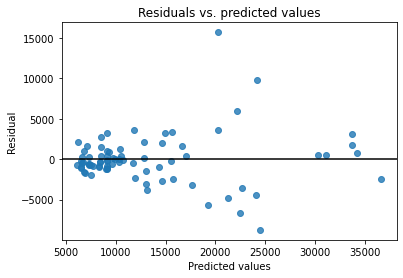

In [ ]:
y_score_orig = np.exp(y_score)
y_test_orig = np.exp(y_test)

residuals_orig = np.subtract(y_test_orig.reshape(-1,1), y_score_orig.reshape(-1,1)) #compute residuals vector

graph = sns.regplot(x = y_score_orig, y = residuals_orig, fit_reg=False)
graph.axhline(0, color='black')
plt.title('Residuals vs. predicted values')
plt.xlabel('Predicted values')
plt.ylabel('Residual')


From the plot results we can see that the model's performance is sufficient in predicting low price values, while for higher prices, the model's prediction are significantly worse (large residual value).